In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

In [2]:
plt.rcParams['figure.dpi'] = 200
matplotlib.rcParams['axes.linewidth'] = 0.75 #set the value globally
matplotlib.rcParams['xtick.major.width'] = 0.75
matplotlib.rcParams['ytick.major.width'] = 0.75
matplotlib.rcParams['axes.labelsize'] = 7
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
matplotlib.rcParams['xtick.labelsize'] = 6
matplotlib.rcParams['ytick.labelsize'] = 6
matplotlib.rcParams['legend.fontsize'] =5
matplotlib.rcParams['pdf.fonttype']=42


matplotlib.rcParams['figure.figsize'] = (3.4908516673585166, 2.327234444905678)
matplotlib.rcParams['savefig.dpi'] = 300
matplotlib.rc('font', size= 7)
params= {'text.latex.preamble' : [r'\usepackage{amsmath}']}
plt.rcParams.update(params)

In [3]:
efficiency = 1 # evaluated acceptance at 64 keV
alpha = 1.64 # C.I for 90% 
M = 50 #50 # target mass in kg
N_A = 6.023e23 # Avogadro´s number
abundance = 0.000994 # easy, right? was wrong !!
A = 0.124 # Xe124 molar mass
time = 10


theory_2vecbp = 1.8e23
eff_2vecbp = 1/100*(np.loadtxt("Results_Paper/fraction_1_to_50_zres_in_1steps_10xy_nothreshold_2vECB+_1_2019_11_10.txt")[9])
#decays = 2.3
#decay_rate_2vecbp = decays * 1/(N_xe124*time*(np.asarray(eff_2vecbp)/100))
#half_life_2vecbp = np.log(2)/decay_rate_2vecbp*1
decay_rate_theory = np.log(2)/theory_2vecbp

cut = np.arange(0,400,10)
height = (1200-2*cut)
radius = 600-cut
volume = np.pi*radius**2*height
density = 2.900e-6 # g/mm3
norm_factor = 100/7.82434511 #  
M_t = volume * density*abundance*norm_factor
#print(volume)
#print(M_t)
N_xe124_t = M_t * (N_A/A)  #abundance * M * (N_A/A) # number of Xe124 particles
decay_no_theory = decay_rate_theory * (N_xe124_t*time*(np.asarray(eff_2vecbp)))


In [4]:
#y_axis_bkg_fv = np.loadtxt("Results_Paper/fvstudy_0_to_400mm_in_100_no_of_events_2veb+b+_12ers_10z_10xy_20191112.txt")
y_axis_bkg_fv = np.loadtxt("Results_Paper/fvstudy_0_to_400mm_in_10_no_of_events_2vecb+_12ers_10z_10xy_20191104.txt")
x_axis_bkg_fv = np.arange(0,400,100)

In [5]:
cu_density =  9 # g/cm3
nexo_cu_mass = 650e3
nexo_concentration_uth = 0.3e-12/10e-12
nexo_layer_volume = np.pi*122*61**2
nexo_volume = nexo_layer_volume - (volume[0]/1000)
U_TH_decays = 3.52e+02#
nexo_factor = 1e9/10/nexo_volume * nexo_concentration_uth * U_TH_decays  


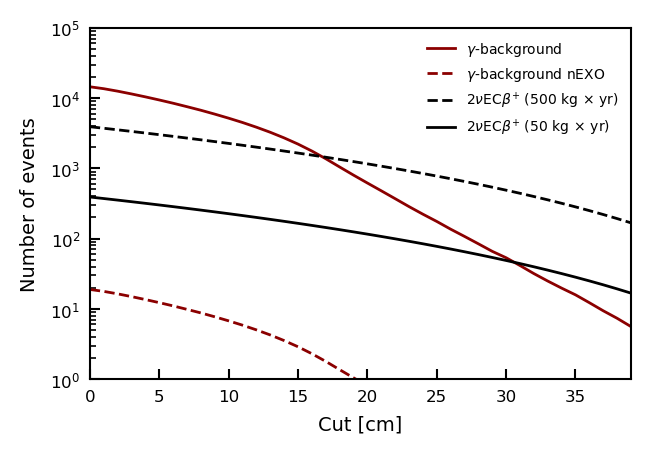

In [6]:
plt.plot(cut/10,y_axis_bkg_fv/20, label = r"$\gamma$-background", color ="darkred",linewidth=1)
plt.plot(cut/10,y_axis_bkg_fv/nexo_factor, label = r"$\gamma$-background nEXO", color ="darkred",linewidth=1, linestyle="dashed")
plt.plot(cut/10,decay_no_theory, label = r"2$\nu$EC$\beta^{+}$ (500 kg$\,\times\,$yr)",color ="black",linewidth=1, linestyle='dashed')
plt.plot(cut/10,decay_no_theory/10, label = r"2$\nu$EC$\beta^{+}$ (50 kg$\,\times\,$yr)",color ="black",linewidth=1)

plt.ylabel("Number of events")
plt.xlabel("Cut [cm]")
plt.yticks()
plt.xticks()
plt.legend(frameon=False)
plt.xlim(0,39)
plt.yscale('log')
plt.ylim(1e0,1e5)
ax = plt.gca()
#ax.invert_xaxis()
plt.draw()
plt.savefig("background_cut_example_2vecb+.png", dpi=300, bbox_inches="tight")
plt.savefig("background_cut_example_2vecb+.pdf", dpi=300, bbox_inches="tight")


plt.show()

In [7]:
darwin_list=[]
nexo_list=[]
decay_list = ["2vECB+","0vECB+_new","0vB+B+_new","0vECEC","0vECEC_2","2vB+B+"]

for entries in decay_list:
    darwin_list.append(np.loadtxt("Results_Paper/DARWIN_fraction_1_to_50_zres_in_1steps_30xy_nothreshold_%s_1_2019_11_10.txt" %(entries)))
    nexo_list.append(np.loadtxt("Results_Paper/fraction_1_to_50_zres_in_1steps_30xy_nothreshold_%s_1_2019_11_10.txt" %(entries)))


In [8]:
# print efficiencies
for i in np.arange(0,len(decay_list)):
    print(decay_list[i],"DARWIN",darwin_list[i][9])
    print(decay_list[i],"nEXO",nexo_list[i][9])

2vECB+ DARWIN 31.053105310531055
2vECB+ nEXO 27.362736273627362
0vECB+_new DARWIN 26.692669266926693
0vECB+_new nEXO 23.402340234023402
0vB+B+_new DARWIN 9.520952095209521
0vB+B+_new nEXO 8.010801080108012
0vECEC DARWIN 18.55185518551855
0vECEC nEXO 15.251525152515253
0vECEC_2 DARWIN 30.073007300730076
0vECEC_2 nEXO 23.982398239823983
2vB+B+ DARWIN 16.65166516651665
2vB+B+ nEXO 14.201420142014202


In [9]:
y_axis1n = np.loadtxt("Results_Paper/DARWIN_fraction_1_to_50_zres_in_1steps_3xy_nothreshold_0vECB+_new_1_2019_11_10.txt")
y_axis2n = np.loadtxt("Results_Paper/fraction_1_to_50_zres_in_1steps_3xy_nothreshold_0vECB+_new_1_2019_11_10.txt")

y_axis3n = np.loadtxt("Results_Paper/DARWIN_fraction_1_to_50_zres_in_1steps_10xy_nothreshold_0vECB+_new_1_2019_11_10.txt")
y_axis4n = np.loadtxt("Results_Paper/fraction_1_to_50_zres_in_1steps_10xy_nothreshold_0vECB+_new_1_2019_11_10.txt")

y_axis5n = np.loadtxt("Results_Paper/DARWIN_fraction_1_to_50_zres_in_1steps_30xy_nothreshold_0vECB+_new_1_2019_11_10.txt")
y_axis6n = np.loadtxt("Results_Paper/fraction_1_to_50_zres_in_1steps_30xy_nothreshold_0vECB+_new_1_2019_11_10.txt")

y_axis7n = np.loadtxt("Results_Paper/DARWIN_fraction_1_to_50_zres_in_1steps_noxy_nothreshold_0vECB+_new_1_2019_11_10.txt")
y_axis8n = np.loadtxt("Results_Paper/fraction_1_to_50_zres_in_1steps_noxy_nothreshold_0vECB+_new_1_2019_11_10.txt")

x_axis = np.arange(1,50,1)

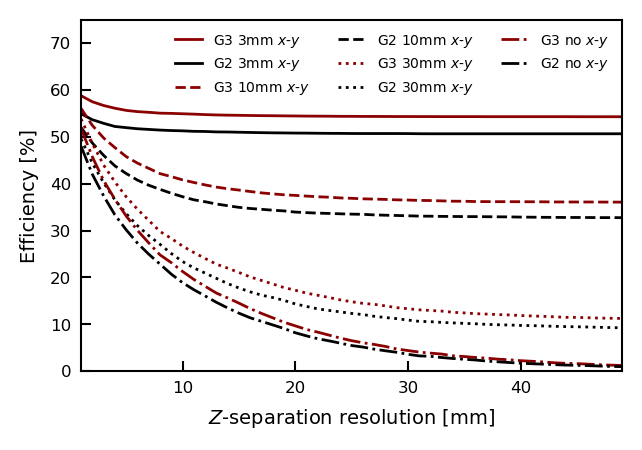

In [29]:
plt.plot(x_axis,y_axis1n, label = "G3 3mm $x$-$y$", color ="darkred", linewidth=1)
plt.plot(x_axis,y_axis2n, label = "G2 3mm $x$-$y$", color ="black", linewidth=1)
plt.plot(x_axis,y_axis3n, label = "G3 10mm $x$-$y$", color ="darkred", linestyle="dashed", linewidth=1)
plt.plot(x_axis,y_axis4n, label = "G2 10mm $x$-$y$", color ="black", linestyle="dashed", linewidth=1)
plt.plot(x_axis,y_axis5n, label = "G3 30mm $x$-$y$", color ="darkred", linestyle="dotted", linewidth=1)
plt.plot(x_axis,y_axis6n, label = "G2 30mm $x$-$y$", color ="black", linestyle="dotted", linewidth=1)
plt.plot(x_axis,y_axis7n, label = "G3 no $x$-$y$", color = "darkred", linestyle="-.", linewidth=1)
plt.plot(x_axis,y_axis8n, label = "G2 no $x$-$y$", color ="black", linestyle="-.", linewidth=1)

plt.ylabel("Efficiency [%]")
plt.xlabel("$Z$-separation resolution [mm]")
plt.yticks()
plt.xticks()
plt.legend(loc = 1, framealpha=1, frameon=False, ncol=3)
plt.xlim(1,49)
plt.ylim(0,75)
plt.draw()
plt.savefig("different_resolutions_0vECB+_new.png", dpi=300, bbox_inches = "tight")
plt.savefig("different_resolutions_0vECB+_new.pdf", dpi=300, bbox_inches = "tight")


plt.show()

In [11]:
for xy in zip(x_axis,y_axis4n):
    if xy[0]==10:
        print(xy)

(10, 37.23372337233724)


In [12]:
filler = np.zeros(220)
filler

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [13]:
y_axis_thr1_new = np.loadtxt("Results_Paper/fraction_5_to_300_threshold_in_1steps_10z_10xy_0vECEC_1_2019_12_07.txt")
#y_axis_thr1_new = np.loadtxt("Results_Paper/fraction_5_to_300_threshold_in_5steps_10z_10xy_0vECB+_new_1_2019_11_08.txt")
y_axis_thr2_new = np.loadtxt("Results_Paper/fraction_5_to_300_threshold_in_1steps_10z_10xy_0vECB+_new_1_2019_12_07.txt")
y_axis_thr3_new = np.loadtxt("Results_Paper/fraction_5_to_300_threshold_in_1steps_10z_10xy_2vECB+_1_2019_12_07.txt")
x_axis_thr=np.arange(1,300,1)

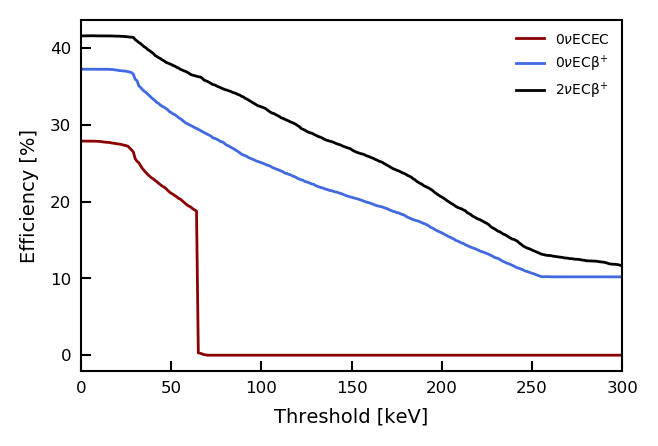

In [14]:
plt.plot(x_axis_thr,y_axis_thr1_new, label = "$0\\nu\\rm{ECEC}$", color ="darkred",linewidth=1, linestyle ="-")
plt.plot(x_axis_thr,y_axis_thr2_new, label = "$0\\nu\\rm{EC}\\beta^{+}$", color ="royalblue",linewidth=1, linestyle="-")
plt.plot(x_axis_thr,y_axis_thr3_new, label = "$2\\nu\\rm{EC}\\beta^{+}$", color ="black",linewidth=1)
plt.ylabel("Efficiency [%]")
plt.xlabel("Threshold [keV]")
plt.yticks()
plt.xticks()
plt.legend(frameon=False)
plt.xlim(0,300)
plt.draw()
plt.savefig("threshold_20191207.pdf", type="pdf", bbox_inches="tight")
plt.show()

In [15]:
y_axis_all1n = np.loadtxt("Results_Paper/DARWIN_fraction_1_to_50_zres_in_1steps_10xy_nothreshold_0vECB+_new_1_2019_11_10.txt")
y_axis_all2n = np.loadtxt("Results_Paper/DARWIN_fraction_1_to_50_zres_in_1steps_10xy_nothreshold_2vECB+_1_2019_11_10.txt")
y_axis_all3n = np.loadtxt("Results_Paper/DARWIN_fraction_1_to_50_zres_in_1steps_10xy_nothreshold_0vB+B+_new_1_2019_11_10.txt")
y_axis_all4n = np.loadtxt("Results_Paper/DARWIN_fraction_1_to_50_zres_in_1steps_10xy_nothreshold_0vECEC_1_2019_11_10.txt")
y_axis_all5n = np.loadtxt("Results_Paper/DARWIN_fraction_1_to_50_zres_in_1steps_10xy_nothreshold_0vECEC_2_1_2019_11_10.txt")
y_axis_all6n = np.loadtxt("Results_Paper/DARWIN_fraction_1_to_50_zres_in_1steps_10xy_nothreshold_2vB+B+_1_2019_11_10.txt")

In [16]:
efficiency = 1 # evaluated acceptance at 64 keV
alpha = 1.64 # C.I for 90% 
M = 50 #50 # target mass in kg
N_A = 6.023e23 # Avogadro´s number
abundance = 0.000994 # easy, right? was wrong !!
A = 0.124 # Xe124 molar mass
time = 10

eff_2vecbp = y_axis_all2n[10]#np.loadtxt("2vecb_10k_nexo.txt")
eff_0vecbp = y_axis_all1n[10]#np.loadtxt("0vecb_10k_nexo.txt")
eff_2vbpbp = y_axis_all6n[10]#np.loadtxt("2vbb_10k_nexo.txt")
eff_0vbpbp = y_axis_all3n[10]#np.loadtxt("0vbb_10k_nexo.txt")
eff_0vECEC = y_axis_all4n[10]#np.loadtxt("0vecec_10k_nexo.txt")



N_xe124 = M * (N_A/A)  #abundance * M * (N_A/A) # number of Xe124 particles
exposure = np.arange(50,500,10)#M*time
decays = 2.3
efficiency_0vecec = 1#1/0.5742


decay_rate_2vecbp = (decays * 1/(exposure*(N_A/A)*(np.asarray(eff_2vecbp)/100)))
half_life_2vecbp = np.log(2)/decay_rate_2vecbp*1

decay_rate_0vecbp = (decays * 1/(exposure*(N_A/A)*(np.asarray(eff_0vecbp)/100)))
half_life_0vecbp = np.log(2)/decay_rate_0vecbp*1

decay_rate_2vbpbp = (decays * 1/(exposure*(N_A/A)*(np.asarray(eff_2vbpbp)/100)))
half_life_2vbpbp = np.log(2)/decay_rate_2vbpbp*1

decay_rate_0vbpbp = (decays * 1/(exposure*(N_A/A)*(np.asarray(eff_0vbpbp)/100)))
half_life_0vbpbp = np.log(2)/decay_rate_0vbpbp*1

decay_rate_0vECEC = (decays * 1/(exposure*(N_A/A)*(np.asarray(eff_0vECEC)/100)))
half_life_0vECEC = np.log(2)/decay_rate_0vECEC*1

print(half_life_2vecbp[-1])
print(half_life_0vecbp[-1])
print(half_life_2vbpbp[-1])
print(half_life_0vbpbp[-1])
print(half_life_0vECEC[-1])

3.294767399134826e+26
2.8887499055771707e+26
2.469102849514929e+26
2.041564994107928e+26
2.3823040567225683e+26


# Limit calculations

## Based on note by C. Weinheimer sent on 11/21/2019

In [17]:
## If KATRIN is the real limit on neutrino mass
## Half-Life calculation from a given neutrino mass: T_0.5 = (m_e/m_v)*2*1/(G*NME**2*R), R=1 except for 0vECEC


m_e = 511000 # electron mass
m_K = 1.1 # Katrin neutrino mass
G=[14.56e-15,25.7e-20,(1710e-20+2290e-20)/2,(108e-20+123e-20)/2] # Xe136, 0vECEC, 0vECB+, OvB+B+
NME_SM_cent = [2.35,0,3.5,3.5] # central value from NSM (Javier), not available for 0vECEC 
NME_QRPA_opt = [2.98,1.298,6.617,6.617] # Xe136, 0vECEC, 0vECB+, 0vB+B+ using QRPA upper limit
NME_QRPA_cent = [2.98,1.290,(4.692+6.617)/2,(4.692+6.617)/2] # Xe136, 0vECEC, 0vECB+, 0vB+B+ using QRPA central limit




In [18]:
# Use KATRIN mass but SM cent and QRPA cent to calculate limit

T_0XE136_K = (m_e/m_K)**2*1/(G[0]*NME_SM_cent[0]**2) # 0vB-B-
T_0ECEC_K = (m_e/m_K)**2*1/(G[1]*NME_QRPA_cent[1]**2*3.2) #0vECEC with R = (2.92 + 3.46)/2
T_0ECBp_K = (m_e/m_K)**2*1/(G[2]*NME_SM_cent[2]**2) # 0vECB+
T_0BpBp_K = (m_e/m_K)**2*1/(G[3]*NME_SM_cent[3]**2) # 0vB+B+


print(T_0XE136_K, T_0ECEC_K, T_0ECBp_K, T_0BpBp_K)


2.6838567416368964e+24 1.5768627996855644e+29 8.808264462809917e+26 1.5252405996207649e+28


In [19]:
# now relate KamlandZen results to the decay: 1.07e26 yrs is T_0.5 Xe136

T_0ECEC_DBD  = G[0]/(G[1]) * (NME_QRPA_cent[0]/NME_QRPA_cent[1])**2 * 1.07e26 / 3.2
T_0ECBp_DBD = G[0]/(G[2]) * (NME_SM_cent[0]/NME_SM_cent[2])**2 * 1.07e26
T_0BpBp_DBD = G[0]/(G[3]) * (NME_SM_cent[0]/NME_SM_cent[3])**2 * 1.07e26


print(T_0ECEC_DBD, T_0ECBp_DBD, T_0BpBp_DBD)


1.0109162055090131e+31 3.511678857142858e+28 6.080829189857763e+29


In [20]:
1.0109162055090131e+31/1e26

101091.62055090131

In [21]:
uncertainty_2v = 4.7e22 # stat uncertainty of the middle value PSF
uncertainty_0v_consv =  (m_e/m_K)**2*1/(G[2]*NME_QRPA_opt[2]**2)# QRPA top
uncertainty_0v_cen_val =  T_0ECBp_K # SM cent
uncertainty_0v_likely = T_0ECBp_DBD # SM cent

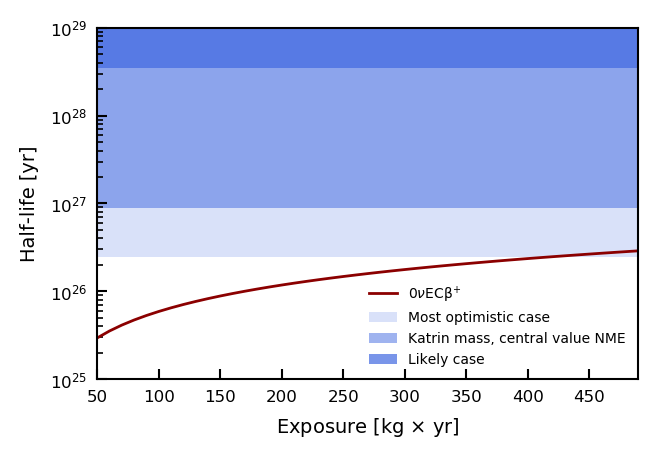

In [22]:
#plt.rcParams["figure.figsize"] = (16,10)

zsep = np.arange(1,50,1)
#plt.plot(exposure,half_life_2vecbp, color = "darkred", linewidth = 4, label = "2vECB+", alpha=1)
#plt.axhline(theory_2vecbp, color = "darkred", linestyle = "dashed", linewidth = 4, label = "2vECB+ theory", alpha=1)
plt.plot(exposure,half_life_0vecbp, color = "darkred", linewidth = 1, label = "$0\\nu\\rm{EC}\\beta^{+}$", alpha=1)
#plt.axhline(theory_0vecbp, color = "black", linestyle = "dashed", linewidth = 4, label = "0vECB+ theory", alpha=1)
"""
plt.plot(exposure,half_life_2vbpbp, color = "blue", linewidth = 4, label = "2vB+B+", alpha=1)
plt.axhline(theory_2vbpbp, color = "blue", linestyle = "dashed", linewidth = 4, label = "2vB+B+ theory", alpha=1)
plt.plot(exposure,half_life_0vbpbp, color = "green", linewidth = 4, label = "0vB+B+", alpha=1)
plt.axhline(theory_0vbpbp, color = "green", linestyle = "dashed", linewidth = 4, label = "0vB+B+ theory", alpha=1)
plt.plot(exposure,half_life_0vECEC, color = "gold", linewidth = 4, label = "0vECEC", alpha=1)
plt.axhline(theory_0vECEC, color = "gold", linestyle = "dashed", linewidth = 4, label = "0vB+B+ theory", alpha=1)
"""

plt.axhspan(uncertainty_0v_consv,1e35,facecolor="royalblue",alpha=0.2, edgecolor=None, label = "Most optimistic case")
plt.axhspan(uncertainty_0v_cen_val,1e35,facecolor="royalblue",alpha=0.5, edgecolor=None, label ="Katrin mass, central value NME")
plt.axhspan(uncertainty_0v_likely,1e35,facecolor="royalblue",alpha=0.7, edgecolor=None, label ="Likely case")

plt.axhspan(theory_2vecbp-uncertainty_2v,theory_2vecbp+uncertainty_2v,color="red",alpha=0.5)


plt.xticks()
plt.yticks()
plt.yscale("log")
plt.ylim(1e25,1e29)
plt.xlim(50,490)
plt.ylabel("Half-life [yr]")
plt.xlabel("Exposure [kg $\\times$ yr]")
#plt.axhline(1, color="black", linewidth=1,alpha=1)
plt.legend(frameon=False)#, loc=7)
#plt.savefig("sensitvity2.pdf", format="pdf", dpi=400, figsize=(12,9))
plt.draw()
plt.savefig("sensitvity5.png", format="png", dpi=300, figsize=(12,9),bbox_inches="tight")
plt.savefig("sensitvity5.pdf", format="pdf", dpi=300, figsize=(12,9),bbox_inches="tight")

plt.show()

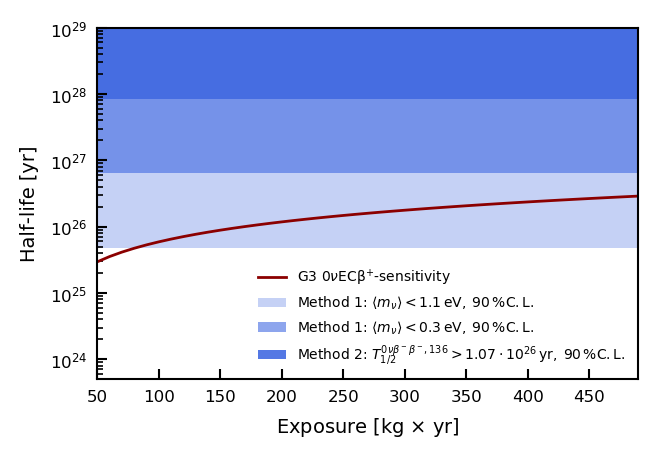

In [23]:
#plt.rcParams["figure.figsize"] = (16,10)

zsep = np.arange(1,50,1)
#plt.plot(exposure,half_life_2vecbp, color = "darkred", linewidth = 4, label = "2vECB+", alpha=1)
#plt.axhline(theory_2vecbp, color = "darkred", linestyle = "dashed", linewidth = 4, label = "2vECB+ theory", alpha=1)
plt.plot(exposure,half_life_0vecbp, color = "darkred", linewidth = 1, label = "G3 $0\\nu\\rm{EC}\\beta^{+}$-sensitivity", alpha=1)
#plt.axhline(theory_0vecbp, color = "black", linestyle = "dashed", linewidth = 4, label = "0vECB+ theory", alpha=1)
"""
plt.plot(exposure,half_life_2vbpbp, color = "blue", linewidth = 4, label = "2vB+B+", alpha=1)
plt.axhline(theory_2vbpbp, color = "blue", linestyle = "dashed", linewidth = 4, label = "2vB+B+ theory", alpha=1)
plt.plot(exposure,half_life_0vbpbp, color = "green", linewidth = 4, label = "0vB+B+", alpha=1)
plt.axhline(theory_0vbpbp, color = "green", linestyle = "dashed", linewidth = 4, label = "0vB+B+ theory", alpha=1)
plt.plot(exposure,half_life_0vECEC, color = "gold", linewidth = 4, label = "0vECEC", alpha=1)
plt.axhline(theory_0vECEC, color = "gold", linestyle = "dashed", linewidth = 4, label = "0vB+B+ theory", alpha=1)
"""

plt.axhspan(4.8e25,1e35,facecolor="royalblue",alpha=0.3, edgecolor=None, label = "Method 1: $\\langle m_\\nu\\rangle < 1.1\\,\\rm{eV,}\\; 90\\,\\%\\rm{C.L.}$")
plt.axhspan(6.5e26,1e35,facecolor="royalblue",alpha=0.6, edgecolor=None, label ="Method 1: $\\langle m_\\nu\\rangle < 0.3\\,\\rm{eV, }\\; 90\\,\\%\\rm{C.L.}$")
plt.axhspan(8.4e27,1e35,facecolor="royalblue",alpha=0.9, edgecolor=None, label ="Method 2: $T_{1/2}^{0\\nu\\beta^-\\beta^-,136} > 1.07 \\cdot 10^{26}\,\\rm{yr,}\\; 90\\,\\%\\rm{C.L.}$")

#plt.axhspan(theory_2vecbp-uncertainty_2v,theory_2vecbp+uncertainty_2v,color="red",alpha=0.5)


plt.xticks()
plt.yticks()
plt.yscale("log")
plt.ylim(5e23,1e29)
plt.xlim(50,490)
plt.ylabel("Half-life [yr]")
plt.xlabel("Exposure [kg $\\times$ yr]")
#plt.axhline(1, color="black", linewidth=1,alpha=1)
plt.legend(frameon=False, facecolor='white', edgecolor='white', framealpha=1, loc='lower right')
#plt.savefig("sensitvity2.pdf", format="pdf", dpi=400, figsize=(12,9))
plt.draw()
plt.savefig("sensitvity5.png", format="png", dpi=300, figsize=(12,9),bbox_inches="tight")
plt.savefig("sensitvity5.pdf", format="pdf", dpi=300, figsize=(12,9),bbox_inches="tight")

plt.show()

In [24]:
# calculate 2vECB+ and 2vB+B+ from 2vECEC
G_2vECEC = [15096e-24,17200e-24,20200e-24]
G_2vECBp = [1245e-24,1530e-24,1720e-24]
G_2vBpBp = [4261e-29,4770e-29,4850e-29]

In [25]:
np.mean(G_2vECEC)/np.mean(np.mean(G_2vECBp))*1.4e22

1.6350255839822023e+23

In [26]:
np.mean(G_2vECEC)/np.mean(np.mean(G_2vBpBp))*1.4e22

5.294604135148764e+27

# OLD STUFF #

NameError: name 'theory_2vbpbp' is not defined

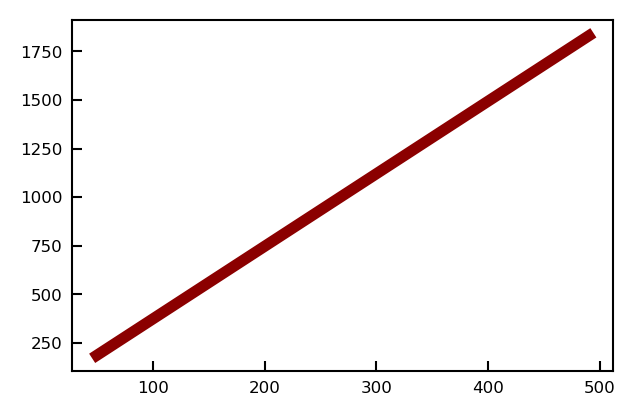

In [27]:
#plt.rcParams["figure.figsize"] = (16,10)

zsep = np.arange(1,50,1)
plt.plot(exposure,half_life_2vecbp/theory_2vecbp, color = "darkred", linewidth = 4, label = "2vECB+", alpha=1)
plt.plot(exposure,half_life_2vbpbp/theory_2vbpbp, color = "blue", linewidth = 4, label = "2vB+B+",alpha=1)
plt.plot(exposure,half_life_0vecbp/theory_0vecbp, linestyle = "dashed", color = "darkred", linewidth = 4, label = "0vECB+")
plt.plot(exposure,half_life_0vbpbp/theory_0vbpbp, linestyle = "dashed",color = "blue" , linewidth = 4, label = "0vB+B+")
plt.plot(exposure,half_life_0vECEC/theory_0vECEC, linestyle = "dashed",color = "darkgreen", linewidth = 4, label = "0vECEC")

plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.yscale("log")
#plt.xlim(1,50)
plt.ylabel("experiment/theory",fontsize=40)
plt.xlabel("exposure [kg x yr]",fontsize=40)
plt.axhline(1, color="black", linewidth=1,alpha=1)
plt.legend(fontsize = 16)#, loc=7)
#plt.savefig("sensitvity2.pdf", format="pdf", dpi=400, figsize=(12,9))
plt.savefig("sensitvity3.png", format="png", dpi=300, figsize=(12,9))




plt.show()

In [ ]:
y_axis_bkg1 = np.loadtxt("Results_Paper/fraction_bkg_1_to_50_z_10xy_in4steps_2vecb+_2019_09_28.txt")
y_axis_bkg2 = np.loadtxt("Results_Paper/fraction_bkg_1_to_50_z_no_xy_in4steps_2vecb+_2019_09_28.txt")
y_axis_bkg3 = np.loadtxt("Results_Paper/worse_res_fraction_bkg_1_to_50_z_10_xy_in4steps_2vecb+_2019_09_28.txt")
x_axis_bkg = np.arange(1,50,4)

plt.plot(x_axis_bkg,y_axis_bkg1, label = "Gamma BKG 3mm XY", color ="darkred",linewidth=1)
plt.plot(x_axis_bkg,y_axis_bkg2, label = "Gamma BKG no XY", color ="darkblue",linewidth=1)
plt.plot(x_axis_bkg,y_axis_bkg3, label = "Gamma BKG 2mm XY, 2 x worse resolution", color ="darkred", linestyle="dashed",linewidth=1)
plt.ylabel("Efficiency[%]", fontsize = 40)
plt.xlabel("Z separation [mm]", fontsize = 40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=40)
plt.legend(fontsize =16)
plt.xlim(2,50)
plt.savefig("background_vs_res_2vECB+.png", dpi=300)
plt.show()

In [ ]:
plt.plot(x_axis,y_axis4, label = "old", color ="red", linestyle="-.", linewidth=1)
plt.plot(x_axis,y_axis4_new, label = "new", color ="black", linestyle="-.", linewidth=1)
plt.ylabel("Efficiency[%]", fontsize = 40)
plt.xlabel("Z separation [mm]", fontsize = 40)
plt.yticks(fontsize=30)
plt.xticks(fontsize=40)
plt.legend(fontsize =16)
plt.xlim(2,50)
plt.savefig("comparison 0vECB+.png", dpi=300, bbox_inch = "tight")
plt.show()